In [13]:
import os, sys
sys.path.append('..')
from link_prediction.model.link_predictor import Link_Prediction_Model
from link_prediction.my_util import my_utils
import torch_geometric

import torch
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def plot_graph_centrality(dataset):
    data = my_utils.data_downloader(dataset, data_dir='../../data')
    data.edge_index = torch_geometric.utils.to_undirected(data.edge_index)
    edge = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])
    G = nx.from_pandas_edgelist(edge)

    # 次数中心性
    degree = nx.degree_centrality(G)
    print("degree completed")

    # 近接中心性
    closeness = nx.closeness_centrality(G)
    print("closeness completed")

    # 媒介中心性
    betweenness = nx.betweenness_centrality(G)
    print("betweenness completed")

    # PageRank
    pagerank = nx.pagerank(G)
    print("pagerank completed")

    df_graph_features = pd.DataFrame({"ID": range(nx.number_of_edges(G))})
    df_graph_features["degree_centrality"] = df_graph_features["ID"].map(degree)
    df_graph_features["closeness_centrality"] = df_graph_features["ID"].map(closeness)
    df_graph_features["betweenness_centrality"] = df_graph_features["ID"].map(betweenness)
    df_graph_features["Pagerank"] = df_graph_features["ID"].map(pagerank)

    sns.pairplot(df_graph_features.iloc[:,1:])
    plt.show()

    return

pricessing Factset in year 2018.
dataset Factset_2018 has been downloaded.
is undirected: False
contains self loops: True
num_nodes: 3928
num_edges: 12772

degree completed
closeness completed
betweenness completed
pagerank completed


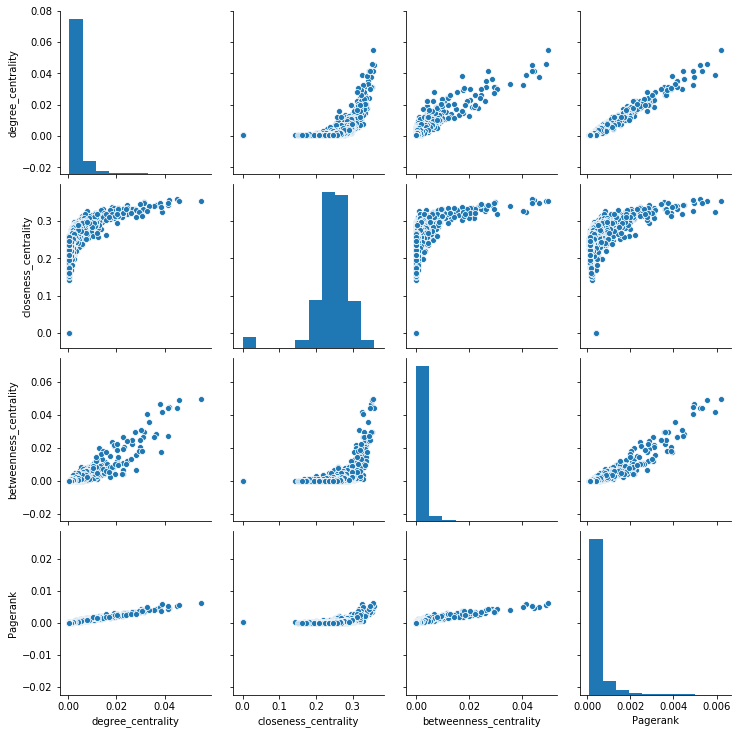

In [23]:
plot_graph_centrality('Factset_2018')

dataset Cora has been downloaded.
is undirected: True
contains self loops: False
num_nodes: 2708
num_edges: 10556

degree completed
closeness completed
betweenness completed
pagerank completed


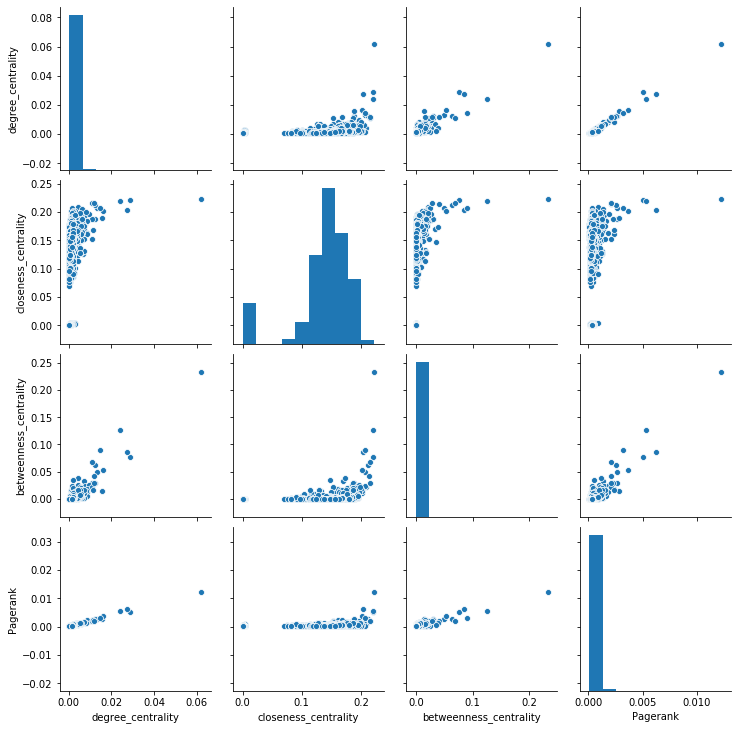

In [24]:
plot_graph_centrality('Cora')

Processing...
Done!
dataset CiteSeer has been downloaded.
is undirected: True
contains self loops: False
num_nodes: 3327
num_edges: 9104

degree completed
closeness completed
betweenness completed
pagerank completed


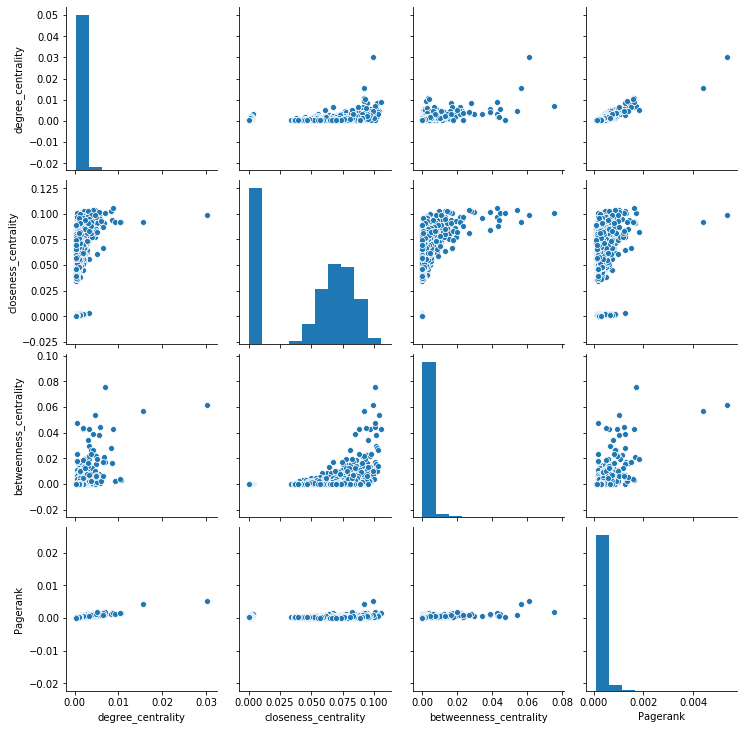

In [26]:
plot_graph_centrality('CiteSeer')

In [27]:
plot_graph_centrality('PubMed')

Processing...
Done!
dataset PubMed has been downloaded.
is undirected: True
contains self loops: False
num_nodes: 19717
num_edges: 88648

degree completed


KeyboardInterrupt: 

dataset Cora has been downloaded.
is undirected: True
contains self loops: False
num_nodes: 2708
num_edges: 10556



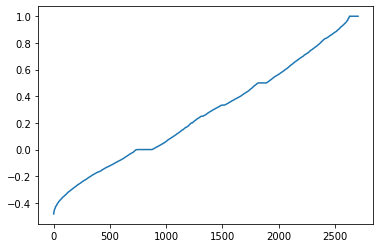

In [121]:
data = my_utils.data_downloader('Cora', data_dir='../../data')
data.edge_index = torch_geometric.utils.to_undirected(data.edge_index)
edge = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])
G = nx.from_pandas_edgelist(edge)

adj_matrix = np.array(nx.adjacency_matrix(G).todense())
norm_adj_matrix = adj_matrix + np.eye(adj_matrix.shape[0])
norm_deg_inv_sqrt_matrix = np.sqrt(np.diag(1/norm_adj_matrix.sum(axis=1)))
renormalized_layer = np.dot(np.dot(norm_deg_inv_sqrt_matrix,norm_adj_matrix),norm_deg_inv_sqrt_matrix)

eig_val, eig_vec = np.linalg.eig(renormalized_layer)

plt.plot(sorted(eig_val.real))
plt.show()

In [122]:
for val in sorted(eig_val.real)[::-1]:
    if val.real<1:
        print(val.real, 1/val.real)

0.9999999999999998 1.0000000000000002
0.9999999999999994 1.0000000000000007
0.9999999999999993 1.0000000000000007
0.9999999999999993 1.0000000000000007
0.9999999999999992 1.0000000000000009
0.9999999999999991 1.0000000000000009
0.9999999999999991 1.0000000000000009
0.9999999999999989 1.000000000000001
0.9999999999999987 1.0000000000000013
0.9999999999999982 1.0000000000000018
0.999999999999998 1.000000000000002
0.9999999999999977 1.0000000000000024
0.9999999999999976 1.0000000000000024
0.9999999999999969 1.000000000000003
0.9999999999999967 1.0000000000000033
0.9999999999999964 1.0000000000000036
0.9999999999999956 1.0000000000000044
0.9999999999999953 1.0000000000000047
0.9999999999999941 1.000000000000006
0.999999999999993 1.000000000000007
0.9999999999999922 1.0000000000000078
0.9999999999999917 1.0000000000000084
0.9999999999999909 1.000000000000009
0.9999999999999889 1.000000000000011
0.996379356251032 1.0036338004458372
0.9943037611116128 1.0057288719113553
0.9932741736112717 1.0

0.5943332831275526 1.6825576295133808
0.5938151684625469 1.684025692016441
0.5931469535821303 1.6859228458661124
0.5926156736091571 1.6874342757588312
0.5916755977792223 1.6901153330530623
0.5915576300313763 1.6904523739250221
0.5903036502884381 1.6940433953125198
0.5899084530623052 1.6951782853913122
0.5897294451333461 1.695692843985238
0.5895020890791896 1.6963468298509576
0.5881399619945388 1.7002755544934143
0.5880266884929441 1.7006030841268511
0.5878467712588602 1.7011235731694558
0.5865030937813444 1.7050208440551082
0.5857583772875028 1.707188558925515
0.5849276522472255 1.709613139604725
0.5842815348890248 1.7115036849315022
0.583548806588336 1.713652720577748
0.5832473565314904 1.7145384180511214
0.5825388383546006 1.716623741044514
0.5820573898626589 1.7180436455517867
0.5817333936927855 1.7190005092403235
0.5809715886906708 1.7212545664301568
0.5807642078056248 1.721869196757884
0.5806953729397614 1.7220733048681194
0.5800721225425981 1.7239235624990135
0.5797323676673166 1

0.3479873584740636 2.873667607883901
0.3474257691704311 2.878312689319962
0.3472299220658107 2.8799361358335624
0.34670808916536855 2.8842707489384027
0.34646200235599434 2.886319403570515
0.3463281190158569 2.887435195391149
0.3456259093170788 2.893301610333256
0.3449960098750186 2.898584248444697
0.3441907551399305 2.9053656586256964
0.34367009012748223 2.9097673283964176
0.3431476136822379 2.914197739186441
0.3429963536281137 2.9154828890228615
0.34262802693786576 2.9186170464138534
0.34160316102456545 2.927373379686284
0.3413697728384313 2.9293747706048223
0.3408514345922519 2.933829517825745
0.34041831129288275 2.9375623073919743
0.34001719047164575 2.9410277716043614
0.3395334413925803 2.945217990600712
0.33938144449859187 2.946537049123053
0.3391984338035308 2.9481268200053545
0.3387077939252676 2.9523973700488266
0.33825973270702087 2.9563081363460326
0.3381236552333253 2.9574978991337972
0.3371575752874805 2.965972213874598
0.3362815915782425 2.9736983083337476
0.3360133047920

0.23049102729659104 4.338563681757646
0.22995665546738397 4.348645608745321
0.22973719769945086 4.352799677256576
0.2291885016133708 4.363220636988799
0.22813539223332804 4.383361959801655
0.22765554174678734 4.3926011742435955
0.22681252378034603 4.408927617103006
0.2265266807029122 4.414491029917537
0.22634295375591088 4.4180743575450725
0.22545566027909902 4.435461938556197
0.22495075545605733 4.445417389119831
0.22405369875564987 4.463215762800628
0.22279118477620316 4.488507931786053
0.22159541939256855 4.512728659920739
0.2207188223616879 4.530651211799772
0.22059737883332706 4.533145431231768
0.22003016798166175 4.54483132550871
0.21998548515557717 4.545754458721603
0.21934946352427534 4.558935243939315
0.21928958510441063 4.560180090285039
0.21810379289167478 4.584972992636897
0.2176251588421621 4.595056956283599
0.21730790538648087 4.6017653992914145
0.21621382092463112 4.625051237351681
0.21582991740873914 4.63327796260144
0.2145492163725508 4.6609352245946445
0.2144716957378

/Users/takahiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


 -3.2343814588854212e+16
-3.091781265480675e-17 -3.2343814588854212e+16
-3.2146594414195206e-17 -3.110749422210717e+16
-3.7047530728663035e-17 -2.6992352265634732e+16
-3.7047530728663035e-17 -2.6992352265634732e+16
-3.777652394190194e-17 -2.647146681727363e+16
-3.777652394190194e-17 -2.647146681727363e+16
-4.552612260115084e-17 -2.1965411128043692e+16
-4.552612260115084e-17 -2.1965411128043692e+16
-4.600706647703179e-17 -2.173579140281053e+16
-5.2471767648890995e-17 -1.90578675887458e+16
-5.2471767648890995e-17 -1.90578675887458e+16
-6.17269812528852e-17 -1.6200371048491192e+16
-6.17269812528852e-17 -1.6200371048491192e+16
-7.235676665378551e-17 -1.382040749256839e+16
-7.235676665378551e-17 -1.382040749256839e+16
-7.904201186892368e-17 -1.265149983351021e+16
-7.904201186892368e-17 -1.265149983351021e+16
-8.493244822505764e-17 -1.1774063045376452e+16
-8.493244822505764e-17 -1.1774063045376452e+16
-8.763295855947241e-17 -1.1411231760723296e+16
-8.763295855947241e-17 -1.1411231760723296e+

-0.21430406440874294 -4.666267075983665
-0.2149945302305621 -4.651281122955039
-0.2160755238060114 -4.628011458150075
-0.21627077005619322 -4.62383335362505
-0.21662697866738326 -4.616230195110811
-0.2171995028027794 -4.604062104635736
-0.21846262285033713 -4.577442067447268
-0.21875944863885902 -4.571231122687911
-0.21954298978217107 -4.554916560953244
-0.22003976778158288 -4.544633045571224
-0.22055362678683638 -4.53404468821768
-0.2213622018379319 -4.517483073881511
-0.22248509367843164 -4.4946831424371645
-0.22284799396900862 -4.487363705589693
-0.22348802021144018 -4.474512768308155
-0.22415903324610464 -4.461118454691487
-0.22433198579847366 -4.457679079693699
-0.2249661158579959 -4.445113861641388
-0.22576421420779486 -4.429399953881059
-0.22637839802630572 -4.417382615649562
-0.2266235445636542 -4.412604179876461
-0.22689463174333638 -4.407332127325083
-0.22789517129134865 -4.387982397053807
-0.22821411384407864 -4.381849935377897
-0.22857721385083318 -4.374889268939065
-0.2287

In [100]:
nx.number_connected_components(G)

dataset Cora has been downloaded.
is undirected: True
contains self loops: False
num_nodes: 2708
num_edges: 10556



78

pricessing Factset in year 2018.
dataset Factset_2018 has been downloaded.
is undirected: False
contains self loops: True
num_nodes: 3928
num_edges: 12772



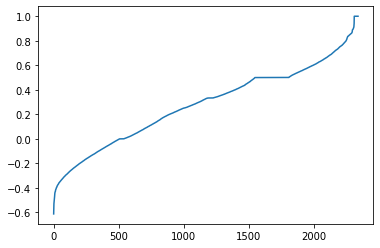

In [117]:
data = my_utils.data_downloader('Factset_2018', data_dir='../../data')
data.edge_index = torch_geometric.utils.to_undirected(data.edge_index)
edge = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])
G = nx.from_pandas_edgelist(edge)

adj_matrix = np.array(nx.adjacency_matrix(G).todense())
norm_adj_matrix = adj_matrix + np.eye(adj_matrix.shape[0])
norm_deg_inv_sqrt_matrix = np.sqrt(np.diag(1/norm_adj_matrix.sum(axis=1)))
renormalized_layer = np.dot(np.dot(norm_deg_inv_sqrt_matrix,norm_adj_matrix),norm_deg_inv_sqrt_matrix)

eig_val, eig_vec = np.linalg.eig(renormalized_layer)

plt.plot(sorted(eig_val.real))
plt.show()

In [120]:
for val in sorted(eig_val.real)[::-1]:
    if val.real<1:
        print(val.real, 1/val.real)

0.9999999999999999 1.0000000000000002
0.9999999999999998 1.0000000000000002
0.9999999999999996 1.0000000000000004
0.9999999999999996 1.0000000000000004
0.9999999999999991 1.0000000000000009
0.9999999999999989 1.000000000000001
0.9999999999999987 1.0000000000000013
0.9999999999999959 1.0000000000000042
0.940852852351577 1.0628654603114505
0.9330397367245516 1.071765714406241
0.9128858088071009 1.0954272597431811
0.9094331088022637 1.099586094151569
0.9067150715287206 1.1028822961043332
0.9042523349441687 1.1058860025633697
0.8998234268559631 1.1113291454236305
0.8969723281586913 1.114861594507385
0.8945469841588226 1.1178842673538707
0.8938575658790606 1.1187464739044346
0.893073833773319 1.119728248867071
0.8920030047307321 1.1210724568151749
0.8902174339977319 1.1233210694484643
0.8886601011613933 1.1252896340154084
0.8818236105426486 1.1340136372450145
0.87090762785119 1.1482273986591696
0.8692727185968125 1.150386959818788
0.8682115569455743 1.1517930071307345
0.8637476774514141 1.1

0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999998 2.000000000000001
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.4999999999999997 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.49999999999999967 2.0000000000000013
0.4999999999

0.30976420703375895 3.228261940189291
0.3091276896134506 3.2349091770150133
0.30820706528348835 3.2445719538590123
0.30783096300240176 3.2485361129581944
0.30767806600697667 3.2501504347642536
0.30691372258957744 3.258244667467206
0.30644648804216573 3.263212466192154
0.30613511695185963 3.266531490920893
0.3055112524933847 3.2732018602871373
0.30511677892822486 3.2774336551161554
0.3046381271430324 3.282583205780031
0.30389461276909585 3.290614436656093
0.30345915968642206 3.2953363511364917
0.30281931836859155 3.3022992237991913
0.302602029095479 3.304670503992137
0.3021504036073036 3.309610008992978
0.30153144151356914 3.316403738795509
0.3011812998873974 3.3202592603653343
0.30065259197294364 3.3260980503703492
0.30007621939559165 3.332486666268266
0.2997449597927037 3.336169524557062
0.2991654778734015 3.342631666957149
0.29899256188079143 3.3445648069288785
0.2987464874069662 3.347319691286459
0.298057002792201 3.355062926326139
0.2976805237072246 3.3593061028860665
0.29695891835

0.04733530992114466 21.12587836999247
0.04669416232657213 21.415953304958048
0.04635771414042365 21.571382854876486
0.04599288086443408 21.742495386352104
0.045801687698500314 21.83325659488183
0.04518932007532497 22.12912250799801
0.04505572426539069 22.194738100529097
0.04406187176902685 22.695359045163094
0.043516063443599005 22.98001981029594
0.04259969427980578 23.474346868119333
0.042392280437218724 23.589200431926752
0.04148116081640247 24.107329214484768
0.04131752296034913 24.202806178861746
0.04064837061229554 24.60123210197052
0.04020616509380508 24.871807536652604
0.039708652436925625 25.183428261345032
0.03889590316411683 25.709648540120384
0.03831495978612205 26.099466255011105
0.03806717431469413 26.26935195486771
0.037278148329157546 26.825366731475718
0.03623801369506289 27.595331477460125
0.035989149760023965 27.78615240059881
0.03521613304918565 28.396076270024324
0.034458084984207805 29.020765386651682
0.03411184561590459 29.315329673447852
0.03405745067831893 29.36

/Users/takahiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


-3.9713590176353084
-0.2527987528614009 -3.9557157172696127
-0.25418576526239256 -3.9341306110029937
-0.25464185190155003 -3.9270842264633754
-0.2558678386462923 -3.9082676638480707
-0.2564645454501044 -3.8991744384977833
-0.25702945024977536 -3.8906047498768053
-0.2582589638456995 -3.87208244433856
-0.25958236121742595 -3.8523418745020233
-0.2602795507565831 -3.8420229214826533
-0.2613399686110857 -3.8264334587418376
-0.2620547627452332 -3.815996280793374
-0.2628808818138418 -3.8040042817116944
-0.2646077464444106 -3.7791788541235407
-0.26512251937053316 -3.771841043055297
-0.2657844782272123 -3.762446952019244
-0.26662237586889564 -3.7506229428085325
-0.26676490522747487 -3.748619028980905
-0.26896380874662806 -3.717972334865431
-0.2694165542190337 -3.711724407205532
-0.27039446530031724 -3.6983005509722124
-0.271366480452851 -3.6850535052495057
-0.2738687479888775 -3.6513841295999665
-0.2740532711949753 -3.6489256108479347
-0.2753086674876188 -3.6322866589188374
-0.2766985571257993 

In [99]:
nx.number_connected_components(G)

30

In [36]:
largest_cc = max(nx.connected_components(G), key=len)
nx.algorithms.distance_measures.radius(G.subgraph(largest_cc))

5

In [37]:
nx.algorithms.distance_measures.diameter(G.subgraph(largest_cc))

10

In [38]:
data = my_utils.data_downloader('Cora', data_dir='../../data')
data.edge_index = torch_geometric.utils.to_undirected(data.edge_index)
edge = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])
G = nx.from_pandas_edgelist(edge)

dataset Cora has been downloaded.
is undirected: True
contains self loops: False
num_nodes: 2708
num_edges: 10556



In [39]:
largest_cc = max(nx.connected_components(G), key=len)
nx.algorithms.distance_measures.radius(G.subgraph(largest_cc))

10

In [40]:
nx.algorithms.distance_measures.diameter(G.subgraph(largest_cc))

19

In [41]:
len(largest_cc)

2485